## Diabetes Patients Analysis

### Objectives

#### The aim of this analysis is to examine a database from the National Institute of Diabetes and Renal Diagnosis and determine whether patients exhibit signs of diabetes using these specific measurements;

#### Pregnancies: Number of times pregnant.

#### Glucose: 2-hour plasma glucose concentration in an oral glucose tolerance test.

#### Blood Pressure: Diastolic blood Pressure (mm Hg).

#### Skin Thickness: Triceps skinfold thickness (mm).

#### Insulin: 2-hour serum insulin (mu U/ml).

#### BMI: Body Mass Index (Weight in kg/(height in m)^2).

#### DiabetesPedigreeFunction: Diabetes pedigree function.

#### Age: Age (years).

#### Outcome: Class Variable (0 or 1, where 1 indicates the presence of diabetes and 0 indicates the absence of diabetes).

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load Data


diabetes_data = pd.read_excel('diabetes_dataset.xlsx')

In [3]:
# A copy of original dataset for easy retrieval incase of any mistake


diabetes_copy = diabetes_data.copy() 

### Data Assessment

In [4]:
# Information about the dataset


diabetes_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Numbers of rows and columns


diabetes_copy.shape

(768, 9)

In [6]:
# To check for total null values


diabetes_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# To check for duplicate values


diabetes_copy.duplicated().sum()

0

In [8]:
diabetes_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### The data set consists of 768 rows and 9 columns.
#### There are no duplicate values and null values
#### The data types appear appropriate for each column

### To understand the distribution of variables and the relationships between them

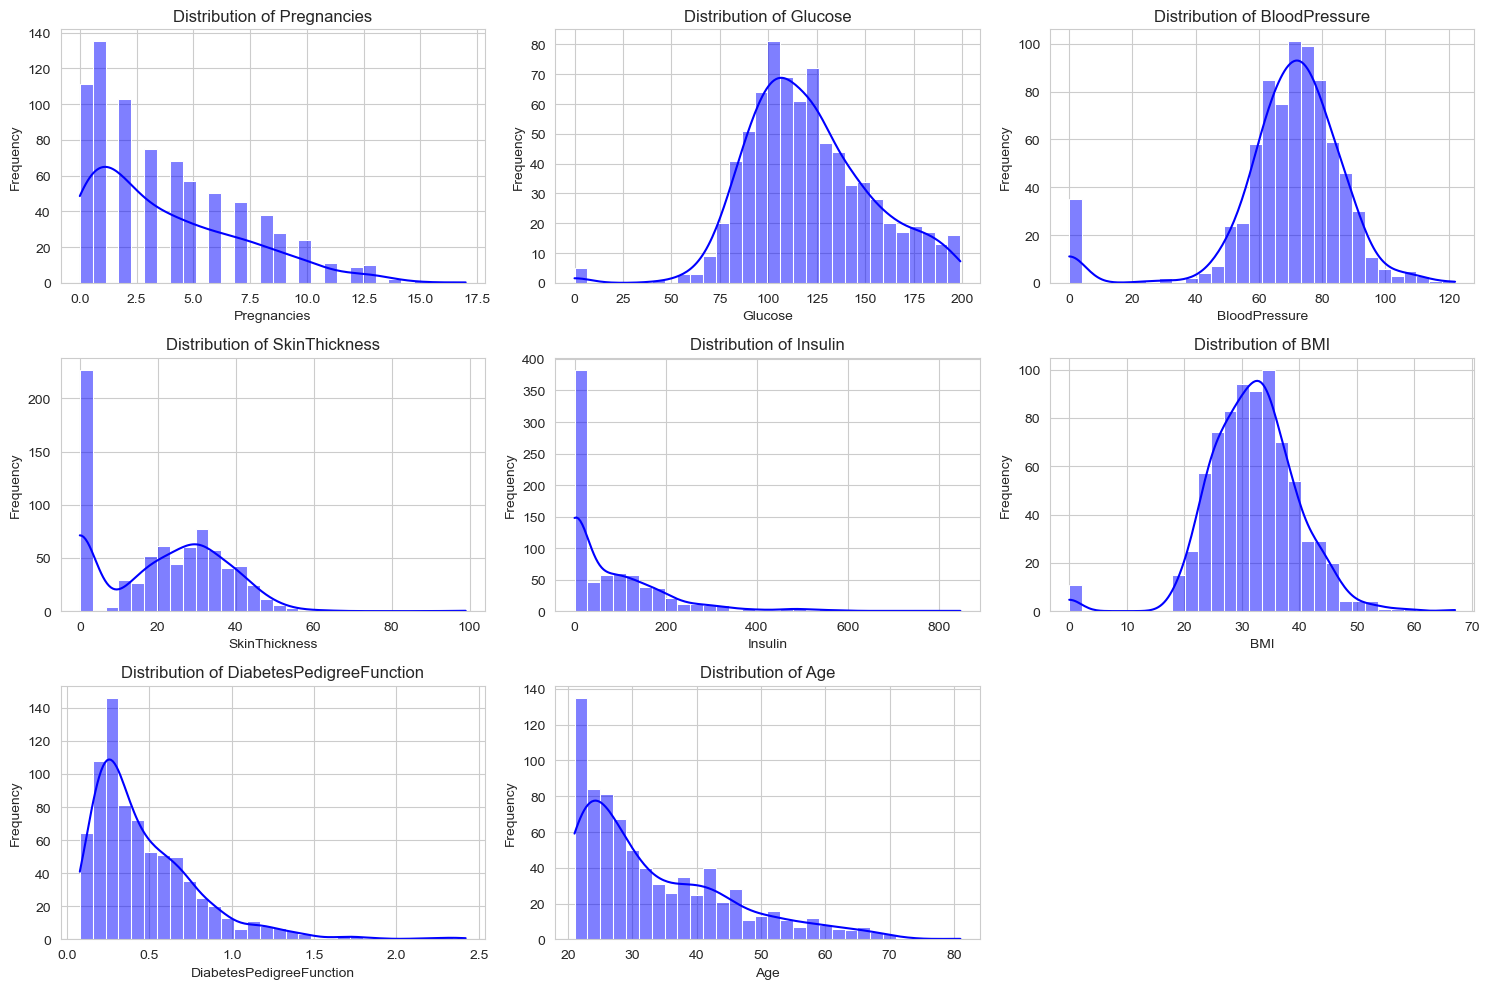

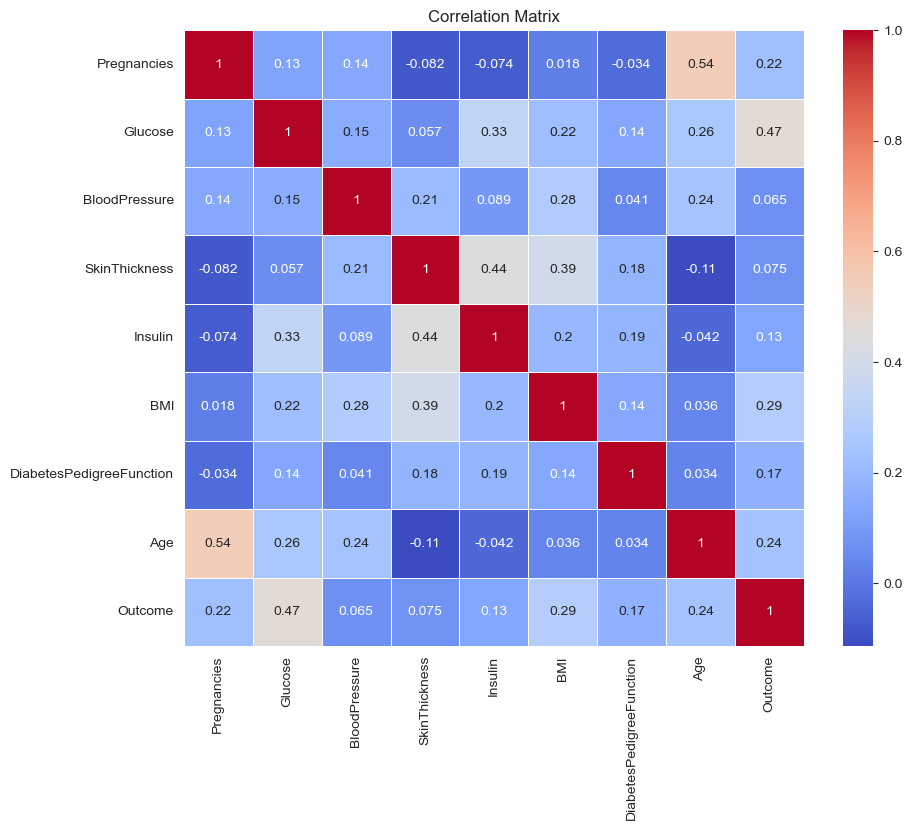

In [9]:
# Configuration for Visualization

sns.set_style('whitegrid')

# Visualization of the  distribution of the variables

plt.figure(figsize=(15, 10))
for i, column in enumerate(diabetes_copy.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(diabetes_copy[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.show()


# Visualization of the correlation between Variables

plt.figure(figsize=(10,8))
correlation_matrix = diabetes_copy.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()
              


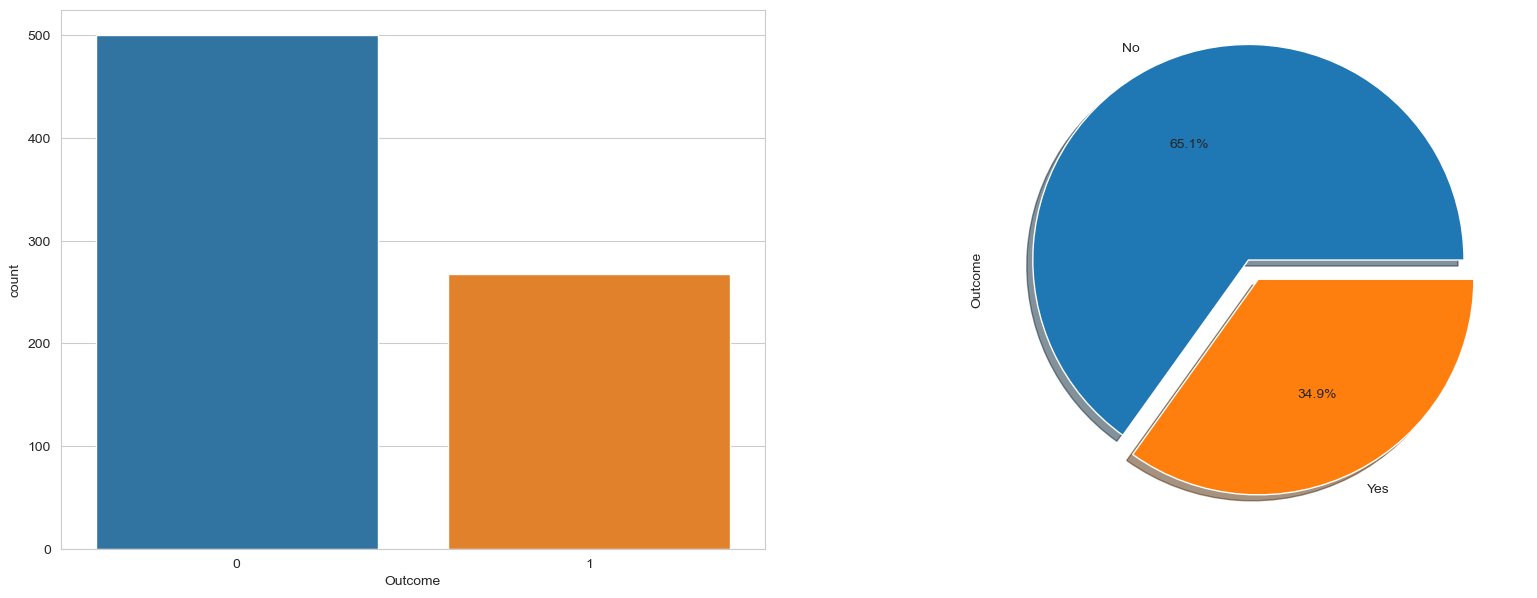

In [10]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.countplot(data = diabetes_copy, x = 'Outcome', ax = ax[0])
diabetes_copy['Outcome'].value_counts().plot.pie(explode= [0.1,0], autopct= '%1.1f%%', labels= ['No','Yes'], shadow=True,
ax=ax[1])                                                 
plt.show()                                                 

#### From the above plot, 65.1% of the patients do not have diabetics while 34.9% of the patients have diabetics

### Variable Distribution

#### - The variable "Pregnancies" displays a right-skewed distribution, suggesting that the dataset predominantly includes individuals with a low to moderate number of pregnancies.

#### - The "glucose" variable exhibits a notable number of values set to 0, which may be unrealistic and warrants further review.

#### - The "BloodPressure," "SkinThickness," and "Insulin" variables also contain values of 0. A determination needs to be made regarding whether these values are realistic or if they indicate missing data.

#### - The "Age" variable is right-skewed, implying that the majority of women in the dataset are relatively young.

### Correlation between Variables

#### - The correlation Matrix shows how the variables are related. A value close to 1 shows a strong positive correlagion while a value close to -1 shows a strong negative correlation.

#### - "Glucose", "BMI", and "Age" variables have moderate correlation with the "Outcome",which shows they could be useful factors in predicting diabetes.

#### Given this analysis, the next steps include:

#### - Determine the approach for managing values of 0 in the variables Glucose, BloodPressure, skinThickness, and Insulin.

#### - Standardize or normalize the features since they exhibit diverse ranges and units.

#### - Divide the data into training and test sets.

#### - Develop and train data for  classification model.

### Data Processing

#### 1. Standardation of features: This includes normalizing or standardizing featues, Splitting the data set into training and testin, and possibly handling correlated or irrelevant features.

#### This is done by setting the values to 0 for variables Glucose, BloodPressure, SkinThickness, and Insulin, replacing them with the median of each column.

In [11]:
# Defining columns that have values of 0 that must be treated

columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']


# Replacing 0 values with NaN

for column in columns_with_zeros:
    diabetes_copy[column] = diabetes_copy[column].replace(0, np.nan)
    
    
# Replacing the NaN with the median of each column

for column in columns_with_zeros:
    diabetes_copy[column].fillna(diabetes_copy[column].median(), inplace=True)


In [12]:
# checking if NaN values still exist in the data set

diabetes_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### 2. Standardization of features: Features will be standardized to have mean as 0 and standard deviation as 1.

#### 3. Division of the Data set: This involves dividing the data set into training and testing in order to evaluate the model's ability to generalize on unseen data.

#### 4. Classification Model Training: Classification algorithm will be used to train the model.

#### 5. Model Evaluation: After training, the model performance will be evaluated on the test set.

In [13]:
# Defining the characteristics and the target variable

x = diabetes_copy.drop("Outcome",axis=1)
y = diabetes_copy["Outcome"]


# Splitting the data set into training and testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Standardization of features

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [14]:
x_train_scaled.shape, x_test_scaled.shape

((614, 8), (154, 8))

#### The data set has been divided into training and testing and also the features have been standardized. The dimensions are as follows:

#### - Training Set: 614 records and 8 features.
#### - Test Set: 154 records and 8 features.

#### Logistic Regression will be used to train the Classification Model.

In [15]:
# Creating and training the Logistic Regression Model

model = LogisticRegression(random_state=42)
model.fit(x_train_scaled, y_train)


# Prediction on the test set

y_pred = model.predict(x_test_scaled)


# Model Evaluation

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [16]:
accuracy, conf_matrix, class_report

(0.7532467532467533,
 array([[82, 17],
        [21, 34]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.80      0.83      0.81        99\n           1       0.67      0.62      0.64        55\n\n    accuracy                           0.75       154\n   macro avg       0.73      0.72      0.73       154\nweighted avg       0.75      0.75      0.75       154\n')

#### - Accuracy: 75.32%. This shows the model predicted the outcome correctly in approximately 75.32% of the cases in the test set.

#### - Confusion Matrix:
   #### 1. True Positives (TP): 34
   #### 2. True Negatives (TN): 82
   #### 3. False Positives (FP): 17
   #### 4. False Negatives (FN): 21

#### - Classification Report: 
#### 1.The precision for class 0 (without diabetes) is 80% while the Precision for class 1 (with diabetes) is 67%.
#### 2. The recall foor class 0 (without diabetes) is 83% while the recall for class 1 (with diabetes) is 62%
      

#### The Logistic Regression Model demonstrates satisfactory performance, although there is potential for enhancement. Given the

#### reasonably improved results observed with the Logistic Regression Model, an alternative model called "Random Forest" will be

#### employed to showcase its performance. 

In [17]:
# Creating and training the Random Forest Model

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train_scaled, y_train)


# Prediction on the test set

y_rf_pred = rf_model.predict(x_test_scaled)


# Model Evaluation

rf_accuracy = accuracy_score(y_test, y_rf_pred)
rf_conf_matrix = confusion_matrix(y_test, y_rf_pred)
rf_class_report = classification_report(y_test, y_rf_pred)

In [18]:
rf_accuracy, rf_conf_matrix, rf_class_report

(0.7337662337662337,
 array([[78, 21],
        [20, 35]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.80      0.79      0.79        99\n           1       0.62      0.64      0.63        55\n\n    accuracy                           0.73       154\n   macro avg       0.71      0.71      0.71       154\nweighted avg       0.73      0.73      0.73       154\n')

#### - Accuracy: 73.37%%. This shows the model predicted the outcome correctly in approximately 75.32% of the cases in the test set.

#### - Confusion Matrix:
   #### 1. True Positives (TP): 35
   #### 2. True Negatives (TN): 78
   #### 3. False Positives (FP): 21
   #### 4. False Negatives (FN): 20

#### - Classification Report: 
#### 1.The precision for class 0 (without diabetes) is 80% while the Precision for class 1 (with diabetes) is 62%.
#### 2. The recall foor class 0 (without diabetes) is 79% while the recall for class 1 (with diabetes) is 64%     



#### The Random Forest Model exhibits comparable performance to Logistic Regression Model. Notably, the precision and recall for

#### class 1 (patients with diabetes) are slightly elevated in the Random Rorest Model. This could be beneficial, particularly if the 

#### priority is to accurately identify individuals with diabetes.


### Simplification of analysis using a decison tree

In [19]:
# Preprocessing
# Set values to 0 for the "Glucose", "SkinThickness", and "Insulin" columns

columns_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin"]
for column in columns_with_zeros:
    diabetes_copy[column].replace(0, diabetes_copy[column].median(), inplace=True)
    

# Split the data set into features (x) and labels (y)

x = diabetes_copy.drop("Outcome",axis=1)
y = diabetes_copy["Outcome"]


# Splitting the data set into training and testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Standardization of features

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


# Train the Model

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train_scaled, y_train)


# Model Evaluation
y_pred = dt_model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:", class_report)

Accuracy: 0.7272727272727273
Classification Report:               precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



In [20]:
# Importance of features

feature_importance = dt_model.feature_importances_
for feature, importance in zip(x.columns, feature_importance):
    print(f"Feature: {feature}, Importance: {importance}")

Feature: Pregnancies, Importance: 0.06075661464468774
Feature: Glucose, Importance: 0.3356187205012328
Feature: BloodPressure, Importance: 0.08631253370211535
Feature: SkinThickness, Importance: 0.05500248709903033
Feature: Insulin, Importance: 0.078591582701987
Feature: BMI, Importance: 0.15055221284220968
Feature: DiabetesPedigreeFunction, Importance: 0.10966647017062481
Feature: Age, Importance: 0.12349937833811234


#### 1. Accuracy: The accuracy of the Decision Tree Model is 72.73%. This Model exhibits comparable performance to Logistic Regression Model and the Random Forest Model.

#### 2. Classification Report:
#### - The precision for class 0 (without diabetes) is 79% while the Precision for class 1 (with diabetes) is 62%.
#### - The recall for class 0 (without diabetes) is 79% while the recall for class 1 (with diabetes) is 62%

#### 3. Importance of Features:
#### - Blood glucose level is a key indicator for diabetes. Therefore, the most important feature for prediction is Glucose which has an important value of 33.56%.
#### - Other indicators are Age, (12.35%), BMI (15.06%), and  DiabetesPedigreeFunction (10.97%).

#### The Decision Tree Model provides a clear interpretation of the most important characteristics when predicting diabetes.

### Conclusion

#### Through exploratory analysis and modeling, glucose stands out as the most influential factor in diagnosing diabetes in the

#### provided dataset. This is followed by factors such as age, BMI, and the diabetes pedigree function. Notably, these findings align

#### with current medical understanding of diabetes risk factors. 

#### The Decision Tree Model achieved an accuracy of 72.73%, indicating a satisfactory performance in predicting diabetes based on

#### the provided features. Nevertheless, as with any model, there is always room for improvement.

#### The result of this analysis is beneficial to both medical professionals and also the patients (monitoring the blood glucose level 

#### regularly and being aware of associated factors).

### Documentation

#### Exploratory Data Analysis (EDA)

#### A detailed analysis of the distribution of each characteristic and its relationship with the target variable (Outcome) was carried out. Outliers were identified and handled, missing values were imputed in columns such as "Glucose", " BloodPressue", "SkinThickness", and "Insulin" using the median.

#### Preprocessing
#### Division of data set into training and test sets to validate the performances of the models and standardization of characteristics to ensure similar scale level.

#### Modeling
#### This incluses the Logistic Regression Model and Decision Tree Model. The performances of these models was evaluated using metrics such as accuracy, precision, and recall.

#### Interpretation
#### The analysis aimed to assess the significance of the characteristics to identify key factors influencing the prediction of diabetes.

### Recommendations

#### 1. Regular Monitoring: Given the high importance of glucose in predicting diabetes, Regular glucose testing allows for the early detection of abnormalities in blood sugar levels. Detecting these abnormalities early provides an opportunity for timely intervention and lifestyle modifications.  Regular glucose testing allows healthcare professionals to identify high-risk individuals.
#### 2. Patient Empowerment and Education: Regular glucose testing empowers individuals with information about their own health. It fosters a sense of responsibility and encourages active participation in managing one's well-being. Education about the significance of glucose levels and the impact of lifestyle choices further equips individuals to make informed decisions about their health.
#### 3. Use of the Model in Clinical Practice: The developed model can be used as an additional tool to assist in the early diagnosis of diabetes, especially in cases where a quick decision based on limited data is required.

### Future Steps

#### 1. Additional Data: This serves as a future step by enhancing the model's predictive accuracy. By adding more diverse data points, the model becomes better equipped to generalize well to unseen instances.
#### 2. Advanced Models:  Models such as Gradient Boosting, neural networks, often exhibit greater complexity and capacity to capture intricate relationships within the data. This can result in higher predictive power, allowing the model to discern subtle patterns and dependencies related to diabetes risk factors.
#### 3. Feature Engineering: This involves creating new features or transforming existing ones to better represent the underlying patterns in the data. This process can lead to improved model performance by providing the algorithm with more informative and relevant input features.
#### 4. Real Life Validation: Real-life validation involves testing the model in a real-world setting, which is essential for assessing its applicability to diverse populations and healthcare environments. This step ensures that the model's predictions align with the complexities and nuances present in actual clinical scenarios. This is done by using real-time patient data and comparing the model prediction with real medical diagnosis.